<a href="https://colab.research.google.com/github/rsilraf/bootcamp_datascience_alura2021/blob/main/Projetos/PROJETO_1_bootcamp_Data_Science_m%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO

Este material tem por objetivo analisar informações do SUS, especificamente dados de internação e óbito e verificar qual o comportamento após o primero caso de COVID-19 aqui no Brasil com a expectativa de ver aumento considerado em ambos os números como consequência da pandemia.

Este também serve como projeto do módulo 1 do *bootcamp - Data Science Aplicada 2 da Alura* (maio, 2021), que tem por objetivo aplicarmos técnicas de obtenção, manipulação e apresentação de dados usando o que foi ensinado durante o módulo 1 (e tentando buscar novas habilidades para fazer o que se deseja).


# FONTE DOS DADOS

Os dados usados na análise foram obtidos do TABNET um sistema do departamento de informática do SUS ([DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=02)) que é do ministério da saúde.


#CARGA DOS DADOS E VERIFICAÇÕES INICIAIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

URL_OBITOS = 'https://raw.githubusercontent.com/rsilraf/bootcamp_datascience_alura2021/main/Dados/SUS_obitos_por_uf_mes_atend_A211436189_28_143_208.csv'
URL_INTERNACOES = 'https://raw.githubusercontent.com/rsilraf/bootcamp_datascience_alura2021/main/Dados/SUS_internacoes_por_uf_mes_atend_A212008189_28_143_208.csv'

internacoes = pd.read_csv(URL_INTERNACOES, encoding='ISO-8859-1', index_col=0, sep=';', skiprows=3, skipfooter=12, na_values='-')
obitos = pd.read_csv(URL_OBITOS, encoding='ISO-8859-1', index_col=0, sep=';', skiprows=3, skipfooter=12, na_values='-')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
internacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 172 entries, 2007/Jan to Total
dtypes: float64(7), int64(165)
memory usage: 36.5+ KB


In [4]:
internacoes.head()

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
12 Acre,1.0,NaN,NaN,NaN,NaN,1.0,NaN,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
13 Amazonas,3.0,2.0,NaN,1.0,NaN,NaN,1.0,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
14 Roraima,NaN,NaN,NaN,NaN,NaN,1.0,NaN,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989
15 Pará,8.0,6.0,NaN,NaN,1.0,1.0,4.0,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,...,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075


In [5]:
obitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 180 entries, 1998/Ago to Total
dtypes: float64(17), int64(163)
memory usage: 38.2+ KB


In [6]:
obitos.head()

,1998/Ago,1998/Set,1999/Set,1999/Out,2000/Jan,2001/Dez,2002/Out,2004/Jul,2005/Nov,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7,26,27,67,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,...,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270,37058
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,14,34,64,107,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,...,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66,18615
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,105,214,260,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,...,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329,64963
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,14,27,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,...,117,83,84,102,100,137,118,120,122,121,105,92,117,107,93,97,135,114,152,136,124,108,124,112,126,92,112,90,241,306,159,98,99,101,133,139,265,295,160,12466
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,12.0,52,172,469,644,583,641,624,635,648,627,650,617,630,597,650,714,571,707,801,719,755,683,731,...,941,911,970,1059,1102,990,879,1023,901,991,872,960,984,886,999,934,987,833,981,973,932,924,950,1022,946,921,1060,1336,2449,1614,1393,1193,1052,1082,978,1127,1185,885,545,139591


# VERIFICAR ALGUNS REGISTROS DE INTERNAÇÕES
* observando SP, RJ e AM
* SP e RJ porque são grandes/importantes estados
e AM porque houve colapso e também crise de abastecimento de oxigênio
* a idéia é tentar verificar alguma alteração após primeiro caso de COVID-19 no Brasil

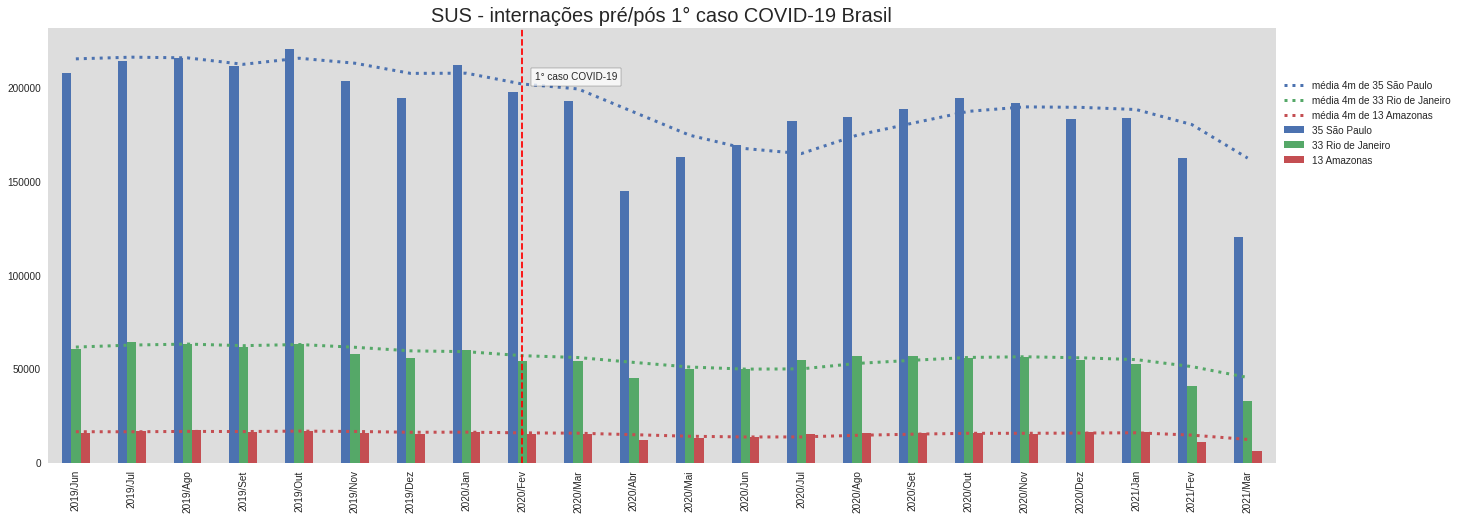

In [7]:
plt.style.use('seaborn')
# ufs = ['35 São Paulo', '31 Minas Gerais', '13 Amazonas', '33 Rio de Janeiro']
ufs = ['35 São Paulo', '13 Amazonas', '33 Rio de Janeiro']
# ufs = ['35 São Paulo']
# ufs = ['33 Rio de Janeiro']
internacoes_filtradas = internacoes.loc[ufs, '2019/Jun':'2021/Mar']

# precisa de 2018 para 2019 ter média baseada nos meses anteriores (4 meses)  
medias = internacoes.loc[ufs, '2018/Jan':'2021/Mar'].T.rolling(4).mean()
# remove 2018
medias = medias.loc['2019/Jun':]

# ordena
internacoes_filtradas['Total'] = internacoes_filtradas.T.sum()
internacoes_filtradas = internacoes_filtradas.sort_values(by='Total', ascending=False).drop(columns='Total')

# PLOT
internacoes_filtradas.T.plot(figsize=(22, 8), kind='bar')
ax = plt.gca()

# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:d}"))

ax.plot(medias.T.loc[internacoes_filtradas.index].T, linewidth=3, ls=':')

# ajusta labels das médias
lines = ax.get_lines()
[ lines[i].set_label(f'média 4m de {idx_name}') for i, idx_name in enumerate(internacoes_filtradas.index) ]

# 22/Fev/20 primeiro caso de covid19
ax.axvline(8, ls='--', color='r', label='')
ax.legend(loc='upper right', bbox_to_anchor=(1.15,.9))
ax.text(.43, .88, '1° caso COVID-19', horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.74))

plt.title('SUS - internações pré/pós 1° caso COVID-19 Brasil', fontsize=20)
plt.grid(False)
ax.set_facecolor('#ddd')



Observações: 
- Houve uma queda em março e abril 2020, somente voltando a subir em Maio e ainda abaixo de Dezembro/19 e Janeiro/20.
- A expectativa era de ver os valor subirem continuamente

# VERIFICAR REGISTROS DE ÓBITOS

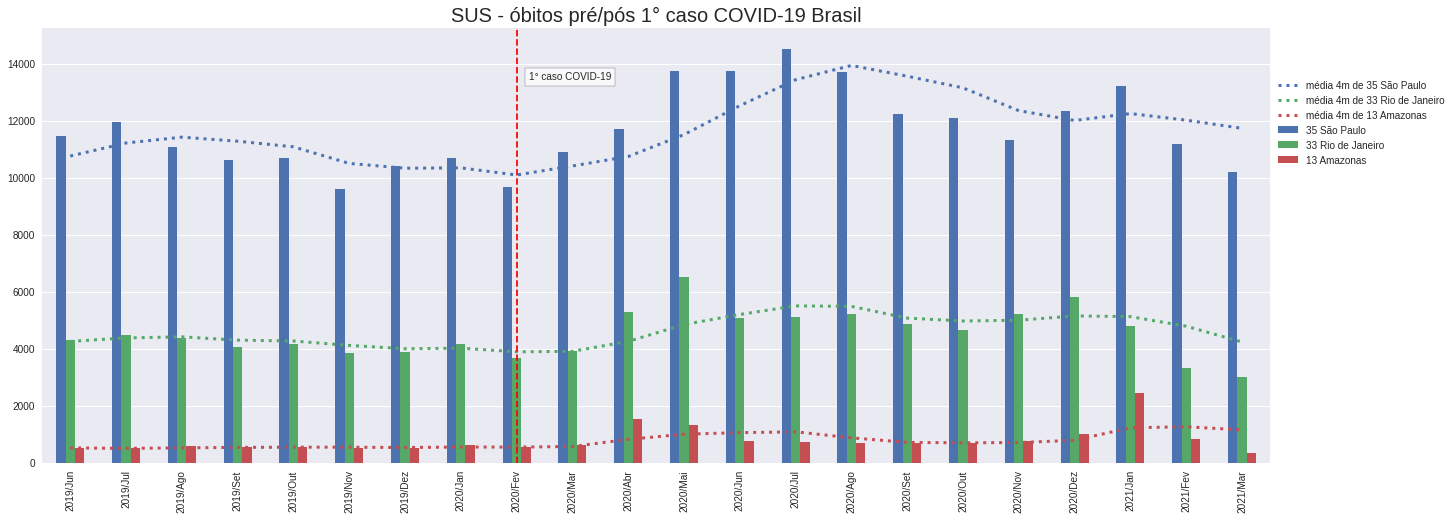

In [8]:

plt.style.use('seaborn')

# ufs = ['35 São Paulo', '31 Minas Gerais', '13 Amazonas', '33 Rio de Janeiro']
ufs = ['35 São Paulo', '13 Amazonas', '33 Rio de Janeiro']
# ufs = ['35 São Paulo']
# ufs = ['33 Rio de Janeiro']
obitos_filtrados = obitos.loc[ufs, '2019/Jun':'2021/Mar']

# precisa de 2018 para 2019 ter média baseada nos meses anteriores (4 meses)
medias = obitos.loc[ufs, '2018/Jan':'2021/Mar'].T.rolling(4).mean()
# remove 2018
medias = medias.loc['2019/Jun':]


# ordena
obitos_filtrados['Total'] = obitos_filtrados.T.sum()
obitos_filtrados = obitos_filtrados.sort_values(by='Total', ascending=False).drop(columns='Total')

# PLOT
obitos_filtrados.T.plot(figsize=(22, 8), kind='bar')
ax = plt.gca()

# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:d}"))

ax.plot(medias.T.loc[obitos_filtrados.index].T, linewidth=3, ls=':')
# ajusta labels das médias
lines = ax.get_lines()
[ lines[i].set_label(f'média 4m de {idx_name}') for i, idx_name in enumerate(obitos_filtrados.index) ]

# 22/Fev/20 primeiro caso covid19
ax.axvline(8, ls='--', color='r', label='')
ax.legend(loc='upper right', bbox_to_anchor=(1.15,.9))
ax.text(.43, .88, '1° caso COVID-19', horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.74))

plt.title('SUS - óbitos pré/pós 1° caso COVID-19 Brasil', fontsize=20)
plt.grid(axis='x')


Observações:
- Diferente das internações os óbitos aumentaram nitidamente já em Março.
- No Amazônas fica o pico de óbitos em Janeiro, condizente com a crise do oxigênio.


[uma matéria sobre crise de oxigêncio em manaus](
https://brasil.elpais.com/brasil/2021-01-15/morrer-sem-oxigenio-em-uma-maca-em-manaus-a-tragedia-que-escancara-a-negligencia-politica-na-pandemia.html)

# PROPORCIONAL DE ÓBITOS EM RELAÇÃO A INTERNAÇÕES
Tentar mostrar o quento, em %, os registros de óbitos no mês, representam sobre o total de internações.

Text(0.5, 1.0, 'SUS - internações, óbitos e proporcional de óbitos  (poluído)')

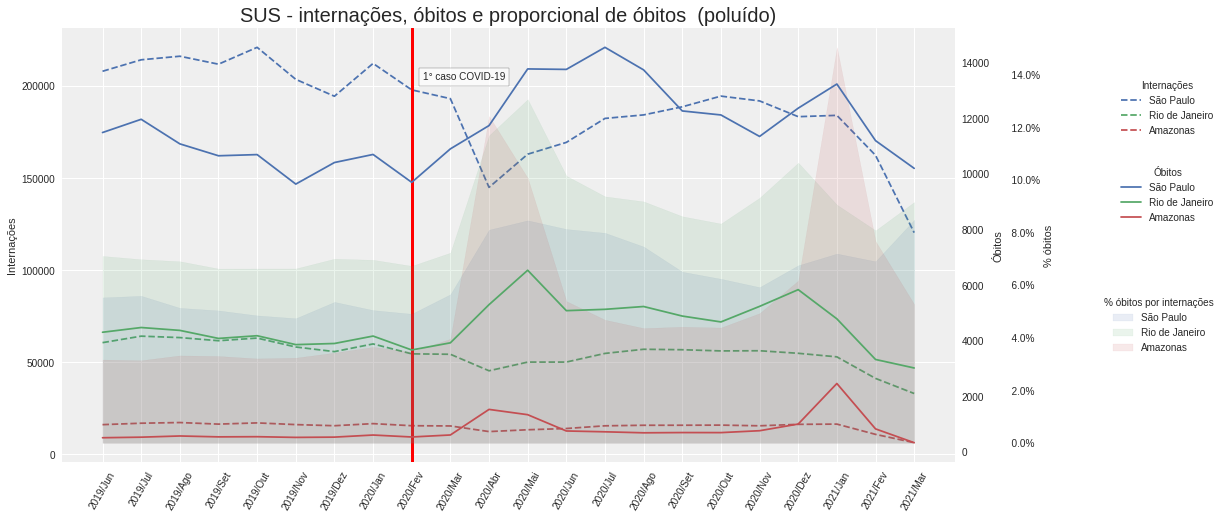

In [9]:
import matplotlib.ticker as ticker

# INTERNAÇÕES
legenda = [ ' '.join(uf.split()[1:]) for uf in internacoes_filtradas.index ]
ax = internacoes_filtradas.T.plot(figsize=(16,8), ls='--')
ax.legend(legenda, bbox_to_anchor=(1.3,.9), title='Internações')
ax.set_ylabel('Internações')
ax.tick_params(axis='x', labelrotation=60)
ax.set_zorder(1)

# ÓBITOS
ax2 = ax.twinx()
ax2.plot(obitos_filtrados.T[internacoes_filtradas.index], ls='-')  # mantém ordenação de internações
ax2.legend(legenda, bbox_to_anchor=(1.3,.7), title='Óbitos')
ax2.grid(False)
ax2.set_ylabel('Óbitos')
ax2.set_zorder(2)

ax2.get_lines()

proporcao_obitos = obitos_filtrados.T[internacoes_filtradas.index].T / internacoes_filtradas * 100 # % obtidos em relação a internações
ax3 = ax.twinx()
ax3.set_zorder(1)
for i, uf in enumerate(proporcao_obitos.index):
  ax3.fill_between(internacoes_filtradas.columns, proporcao_obitos.loc[uf], alpha=.12, color=ax.get_lines()[i].get_color(), label=' '.join(uf.split()[1:]))
ax3.legend(bbox_to_anchor=(1.3,.4), title='% óbitos por internações')
ax3.grid(False)

# desloca eixo
ax3.set_ylabel('% óbitos')
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('                  {x:,}%'))

# COVID-19
# 22/Fev/20 primeiro caso covid19
ax.axvline(8, color='r', label='', linewidth=3)
ax.text(.45, .88, '1° caso COVID-19', horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.74))
ax.set_facecolor('#efefef')

plt.title('SUS - internações, óbitos e proporcional de óbitos  (poluído)', fontsize=20)

Observações:
- interassante, dá para ver aumento e picos nos 3 estados, com destaque para o Amazonas.
- ficou poluído, vamos isolar um estado.

# UM ESTADO POR VEZ
Vamos deixar o gráfico mais limpo e analisar apenas um estado por vez. Amazonas, no caso.



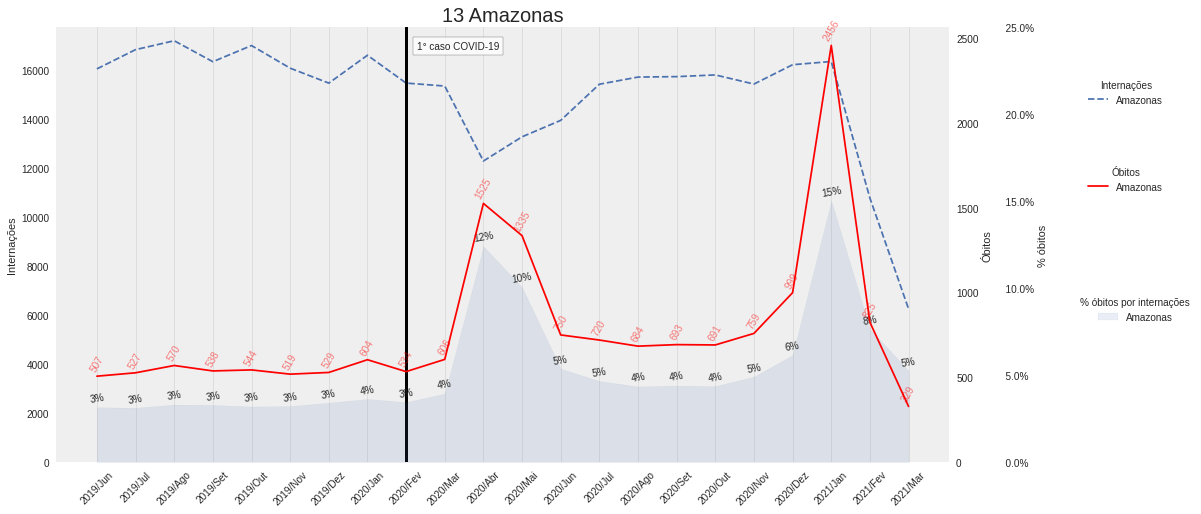

In [10]:
import matplotlib.ticker as ticker

regioes = {
  'Norte'       : ['13 Amazonas', '14 Roraima', '16 Amapá', '15 Pará', '17 Tocantins', '11 Rondônia', '12 Acre'],
  'Nordeste'    : ['21 Maranhão', '22 Piauí', '23 Ceará', '24 Rio Grande do Norte', '26 Pernambuco', '25 Paraíba',
                   '28 Sergipe', '27 Alagoas', '29 Bahia'],
  'Centro-Oeste': ['51 Mato Grosso', '50 Mato Grosso do Sul', '52 Goiás'],
  'Sudeste'     : ['35 São Paulo', '33 Rio de Janeiro', '32 Espírito Santo', '31 Minas Gerais'],
  'Sul'         : ['41 Paraná', '43 Rio Grande do Sul', '42 Santa Catarina'],
  'DF'          : ['53 Distrito Federal'],
}

def anote(ax, dados, formato:str = '{valor}', **kwargs):
  '''Adiciona label do valor do ponto no gráfico'''

  if 'color' not in kwargs and ax.get_lines():
    kwargs['color'] = ax.get_lines()[0].get_color()
  for mes,(_, valor) in enumerate(dados.iteritems()):
    ax.annotate( formato.format(valor=valor),
              (mes, valor),                # this is the point to label
              textcoords="offset points",  # how to position the text
              xytext=(0,5),                # distance from text to points (x,y)
              ha='center',                 # horizontal alignment can be left, right or center
              **kwargs
              )
#


def plot_por_regiao(title:str, internacoes_filtradas:pd.DataFrame, obitos_filtrados:pd.DataFrame):
  '''Plota por região ou estado(s) específico(s)'''
  # INTERNAÇÕES
  legenda = [ ' '.join(uf.split()[1:]) for uf in internacoes_filtradas.index ]
  ax = internacoes_filtradas.T.plot(figsize=(16,8), ls='--')
  ax.legend(legenda, bbox_to_anchor=(1.25,.9), title='Internações')
  ax.set_ylabel('Internações')
  ax.tick_params(axis='x', labelrotation=45)
  ax.set_zorder(1)
  # anota valores
  # for uf in internacoes_filtradas.index:
    # anote(ax, internacoes_filtradas.loc[uf], '{valor}', alpha=.5, rotation=45)


  # ÓBITOS
  if True:
    ax2 = ax.twinx()
    # ax2 = ax
    ax2.plot(obitos_filtrados.T[internacoes_filtradas.index], ls='-', color='r')  # mantém ordenação de internações
    ax2.legend(legenda, bbox_to_anchor=(1.25,.7), title='Óbitos')
    ax2.grid(False)
    ax2.set_ylabel('Óbitos')
    ax2.set_zorder(2)
    # ax2.set_ylim(0, internacoes_filtradas.max().max())
    ax2.set_ylim(0)

    # anota valores
    for uf in obitos_filtrados.index:
      anote(ax2, obitos_filtrados.loc[uf], '{valor}', alpha=.5, rotation=60) 

  # PROPORÇÃO ÓBITOS
  proporcao_obitos = obitos_filtrados.T[internacoes_filtradas.index].T / internacoes_filtradas * 100 # % obtidos em relação a internações

  ax3 = ax.twinx()
  ax3.set_zorder(1)
  for i, uf in enumerate(proporcao_obitos.index):
    ax3.fill_between(internacoes_filtradas.columns, proporcao_obitos.loc[uf], alpha=.12, color=ax.get_lines()[i].get_color(), label=' '.join(uf.split()[1:]))
    # anota valores
    anote(ax3, proporcao_obitos.loc[uf], '{valor:.0f}%', rotation=10)
  ax3.legend(bbox_to_anchor=(1.28,.4), title='% óbitos por internações')
  ax3.grid(False)


  # desloca eixo
  ax3.set_ylabel('% óbitos')
  ax3.set_ylim(0,25)
  ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('                  {x:,}%'))

  # COVID-19
  # 22/Fev/20 primeiro caso covid19
  ax.axvline(8, color='black', label='', linewidth=3)
  ax.text(.45, .95, '1° caso COVID-19', horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.74))

  ax.set_facecolor('#efefef')
  ax.set_title(title, fontsize=20)
  ax.set_ylim(0)
  ax.grid(False)
  ax.grid(axis='x', color='#cdcdcd', ls='-', linewidth=1, alpha=.5)
#

regiao = 'Sudeste'
# ufs = regioes.get(regiao)
# ufs = ['35 São Paulo'] # , '33 Rio de Janeiro', '31 Minas Gerais']
ufs = ['13 Amazonas']
plot_por_regiao(regiao if len(ufs) > 1 else ufs[0], internacoes.loc[ufs, '2019/Jun':'2021/Mar'], obitos.loc[ufs, '2019/Jun':'2021/Mar'] )
# TODAS AS REGIÕES
# for regiao, ufs in regioes.items():
  # plot_por_regiao(regiao, internacoes.loc[ufs, '2019/Jun':'2021/Mar'], obitos.loc[ufs, '2019/Jun':'2021/Mar'] )



Observações:
- uau, aqui fica claro dois momentos claros de escalada de número de óbitos, Abril/20 e Janeiro/21, representando 12% e 5% do volume de interações.
- note que as informações estão distribuídas em eixos separados, embora estejam bem próximas, internações e óbitos são volumes bem diferentes, foi feito assim para a quantidade de internações não achatar demais os outros dados.

# POSSIBILIDADE DE MUDAR DE ESTADO VIA COMBOBOX/DROPDOWN

Aqui um teste para renderizar um combobox/dropdown para poder selecionar o estado de interesse.

Tanto como uma questão de curiosidade de como seria um tipo de implementação dessas como a facilidade para poder mudar o estado e poder analisar uma a um os estados de interesse.

Dropdown(description='Estado:', options=('11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará', '16…

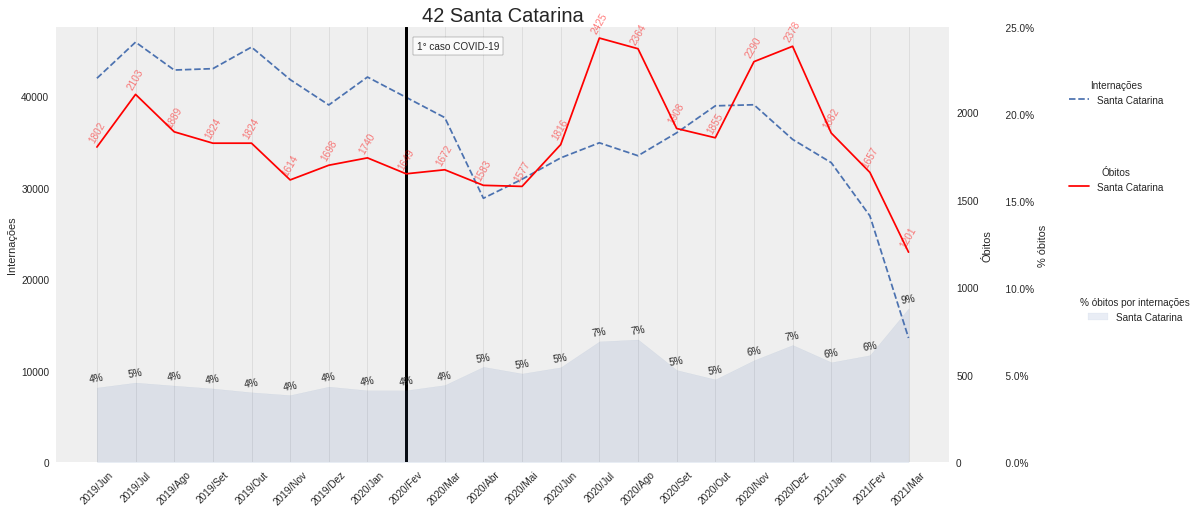

In [30]:
import ipywidgets as widgets
from IPython.display import display

combo_estado = widgets.Dropdown(
    options=obitos.index,
    value=None,
    description='Estado:',
    disabled=False,
)
def cb_estado_on_change(event):
  if event['type'] == 'change' and event['name'] == 'value':
    uf = [event['new']]
    plot_por_regiao(uf[0], internacoes.loc[uf, '2019/Jun':'2021/Mar'], obitos.loc[uf, '2019/Jun':'2021/Mar'] )

combo_estado.observe(cb_estado_on_change)
display(combo_estado)

# VERIFICAR DIFERENÇA DE ÓBITOS 2019 / 2020

Para fechar essa breve análise, seria interessante uma verificação no incremento de registros de óbitos.

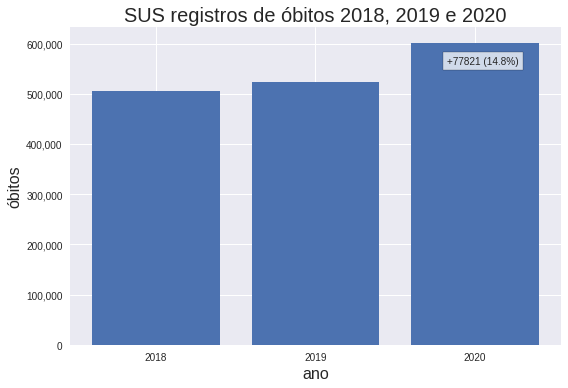

In [26]:
# 2018
obitos_2018 = obitos.loc[:,'2018/Jan':'2018/Dez'].sum().sum()

# 2019
obitos_2019 = obitos.loc[:,'2019/Jan':'2019/Dez'].sum().sum()

# 2020
obitos_2020 = obitos.loc[:,'2020/Jan':'2020/Dez'].sum().sum()

# diferenca
obitos_2019_2020 = (obitos_2020 / obitos_2019 - 1)*100

plt.bar(['2018', '2019','2020'], [obitos_2018, obitos_2019, obitos_2020])
plt.xlabel('ano', fontsize=16)
plt.ylabel('óbitos', fontsize=16)
plt.gca().text(.38, .58, f'+{obitos_2020 - obitos_2019} ({obitos_2019_2020:.1f}%)', horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=.74))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('SUS registros de óbitos 2018, 2019 e 2020', fontsize=20)
plt.tight_layout()

Observações:
- Aqui pudemos ver de fato o incremento significativo no registro de óbitos dado em 2020, descolando de 2019 em quase 15%!

# CONCLUSÕES

### 1) Como projeto de estudo

Para a tarefa proposta de exercitar o aprendido e buscar um pouco além, sinto que o objetivo foi alcançado, mesmo com algumas imperfeições.

A exploração da manipulação dos dados e do uso da matplotlib para a geração dos gráficos foi trabalhosa mas gratificante. Aos poucos barreiras vão sendo quebradas e vai ficando mais fácil conseguir criar e ajustar os gráficos da forma que se deseja. 

Por fim, foi um 'pequeno passo para a humanidade..', muito ainda para aprender!

De análise de informações reais com plotagem de gráficos a até brincadeira com *widget* de interatividade, acredito ter rendido bons frutos.

Aqueles que apreciarem o material encontrarão técnicas como:
  - criação de médias
  - formatar o estilo das linhas
  - adicionar marcadores de valor aos pontos
  - uso de *widget* para alteração da informação plotada
  - plotagem de vários dados no mesmo gráfico
  - inclusão de texto livre no gráfico
  - ajuste de posicionamento da legenda
  - ajuste de estilo do gráfico
  - linha vertical


----


### 2) Como análise de mundo real

Foi possível verificar o aumento causado nos registros de óbito, após a chegada da COVID-19 no Brasil, o que era esperado, porém, fica em aberto o por que de os registros de internação não terem acompanhando os de óbitos.

Como a base não era específica sobre COVID-19, suspeito que pode não ter havido sua atualização completa por estarem dando foco em bases específicas sobre COVID-19 as quais os veículos de comunicação fazem acesso.

Uma possível continuação seria trazer informação de bases específicas sobre COVID-19 para fazer novas comparações. Usando informações de óbitos e também de vacinação, podendo verificar se com o avanço da vacinação as internações e óbitos refletem em queda.



# AGRADECIMENTOS

Agradeço a você que chegou até aqui. Muito obrigado pela curiosidade e pelo seu tempo gasto observando este material.

Agradeço também à Alura pelo desafio proposto.


# REFERÊNCIAS

DATASUS
acesso via: http://www2.datasus.gov.br/DATASUS/index.php?area=02

Matéria sobra crise de oxigênio em Manaus: https://brasil.elpais.com/brasil/2021-01-15/morrer-sem-oxigenio-em-uma-maca-em-manaus-a-tragedia-que-escancara-a-negligencia-politica-na-pandemia.html

Primeiro caso covid no Brasil, 22/Fev/20
fonte: https://www.gov.br/pt-br/noticias/saude-e-vigilancia-sanitaria/2020/02/brasil-confirma-primeiro-caso-do-novo-coronavirus

